In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
df = pd.read_excel("/Users/fikrialinfijar/Desktop/Perkuliahan/Python Notebook/Tugas SDI 3/OnlineRetail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [50]:
# Menghitung jumlah missing value pada setiap atribut
missing_values = df.isnull().sum()

# Menampilkan jumlah missing value pada setiap atribut
print("Jumlah missing value pada setiap atribut:")
print(missing_values)

Jumlah missing value pada setiap atribut:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [51]:
# Mengganti missing value pada atribut 'CustomerID' dengan nilai acak dari nilai yang ada
existing_customer_ids = df['CustomerID'].dropna().unique()
random_customer_id = np.random.choice(existing_customer_ids)
df['CustomerID'].fillna(random_customer_id, inplace=True)

# Menghilangkan baris dengan missing value pada atribut 'Description'
df.dropna(subset=['Description'], inplace=True)

# Menghilangkan baris dengan nilai negatif pada atribut 'Quantity'
df = df[df['Quantity'] >= 0]

# Menghilangkan baris dengan nilai 0 pada atribut 'UnitPrice'
df = df[df['UnitPrice'] > 0]
print (df.isnull(),sum)
print("Jumlah baris setelah preprocessing", len(df))

        InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice   
0           False      False        False     False        False      False  \
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  Country  
0            False   

In [52]:
#Memberikan tanggal terkecil dan terbesar
print("Date Range:",df["InvoiceDate"].min(),"-",df["InvoiceDate"].max())

#Memilih baris-baris yang memiliki tanggal "InvoiceDate" sebelum 2011-12-01
df[df["InvoiceDate"]>"2011-12-01"].shape

#Menampilkan jumlah baris setelah diperbarui
df=df[df["InvoiceDate"]<"2011-12-01"]
print("Shape:",df.shape)

Date Range: 2010-12-01 08:26:00 - 2011-12-09 12:50:00
Shape: (504993, 8)


In [53]:
#Menambhkan atribut "Sales"
df["Sales"]= df['Quantity'] * df['UnitPrice']
print(df.head())


  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Sales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  


In [54]:
#Orders df
orders = df.groupby(["CustomerID","InvoiceNo"]).agg({'Sales': sum,'InvoiceDate': max})
print("Orders Shape:",orders.shape)
print(orders.head())

Orders Shape: (19141, 2)
                         Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00


In [56]:
#Exploratory Data Analysis
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

#Mengubah nama setiap grup
groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

#mengatur ulang index pada df orders dan melakukan agregasi menggunakan fungsi-fungsi pengelompokan sebelumnya
processed_data = orders.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})


processed_data.columns = ['_'.join(col).lower() for col in processed_data.columns]

print(processed_data,processed_data.shape)

            sales_min  sales_max  sales_sum     sales_avg  sales_count   
CustomerID                                                               
12346.0      77183.60   77183.60   77183.60  77183.600000            1  \
12347.0        382.52    1294.32    4085.18    680.863333            6   
12348.0        227.44     892.80    1797.24    449.310000            4   
12349.0       1757.55    1757.55    1757.55   1757.550000            1   
12350.0        334.40     334.40     334.40    334.400000            1   
...               ...        ...        ...           ...          ...   
18280.0        180.60     180.60     180.60    180.600000            1   
18281.0         80.82      80.82      80.82     80.820000            1   
18282.0        100.21     100.21     100.21    100.210000            1   
18283.0          1.95     313.65    1886.88    125.792000           15   
18287.0         70.68    1001.32    1837.28    612.426667            3   

               invoicedate_min     in

In [58]:
#Meanampilkan customer yang melakukan transaksi lebih dari sekali 
processed_data = processed_data.loc[processed_data['invoicedate_purchase_duration'] > 0]
print(processed_data.shape)

(2693, 9)


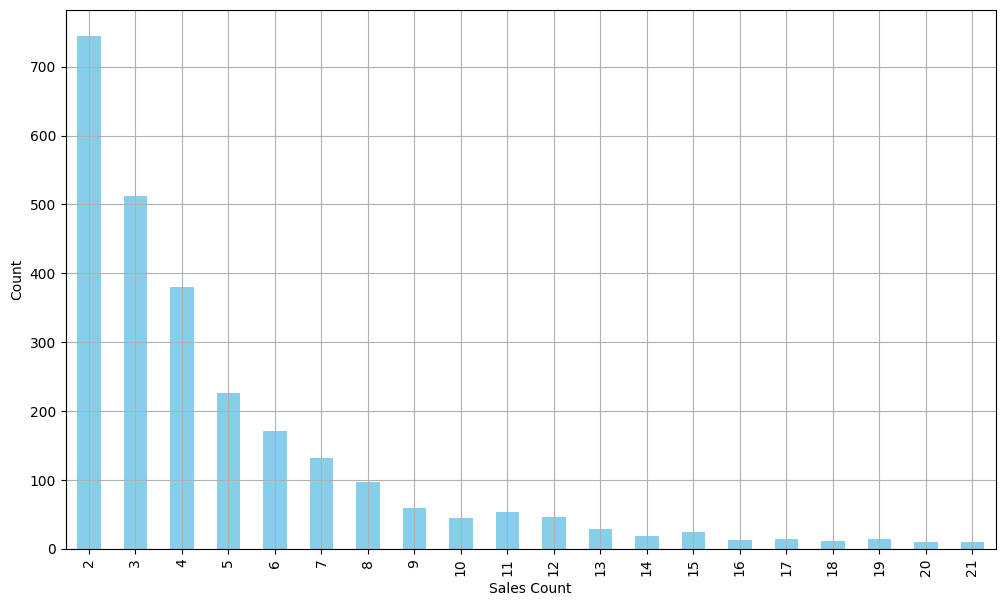

In [59]:
#Visualisasi jumlah customer berdasarkan banyaknya transaksi yang dilakukan ("Sales Count")
ax = processed_data.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar',
    color='skyblue',
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('Sales Count')
ax.set_ylabel('Count')
plt.show()

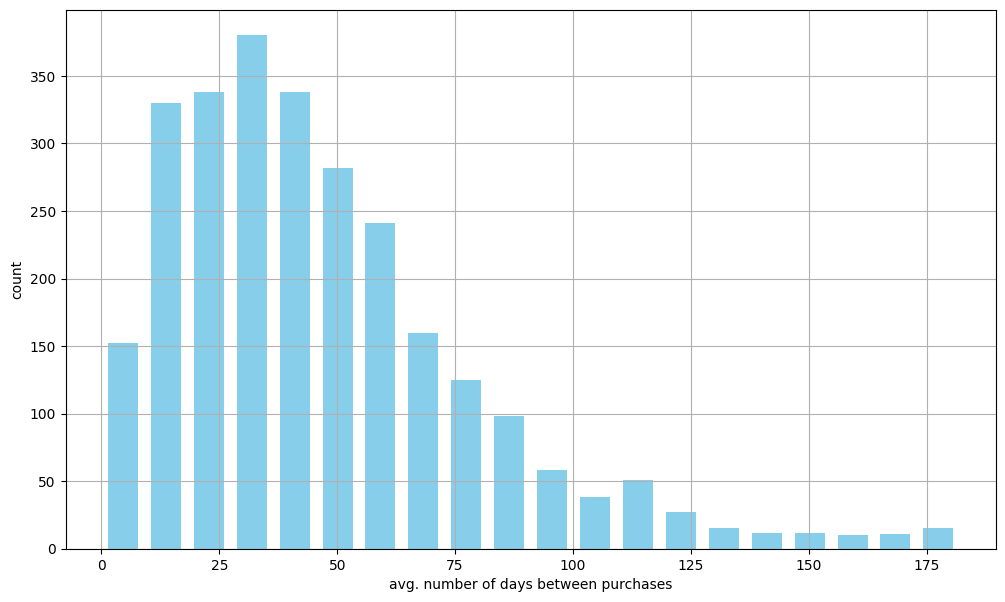

In [60]:
#Visualisasi distribusi frekuensi pembelian pelanggan berdasarkan rata-rata jumlah hari antara pembelian (invoicedate_purchase_frequency)
ax = processed_data['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')
plt.show()


In [61]:
#Predicting 3 Month CLV
#Data Preparation
clv_freq = '3M'

clean_data = orders.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})
clean_data.columns = ['_'.join(col).lower() for col in clean_data.columns]
clean_data = clean_data.reset_index()

date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(clean_data.reset_index()['InvoiceDate'].unique(), reverse=False)
    )
}

print(date_month_map)
clean_data['M'] = clean_data['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

{'2010-12-31': 'M_1', '2011-03-31': 'M_2', '2011-06-30': 'M_3', '2011-09-30': 'M_4', '2011-12-31': 'M_5'}


In [64]:
# Final Processed Dataset for Modelling
# Features Set
features_df = pd.pivot_table(
    clean_data.loc[clean_data['M'] != 'M_5'],
    values=['sales_sum', 'sales_avg', 'sales_count'],
    columns='M',
    index='CustomerID'
)
features_df = features_df.fillna(0)
print(features_df.head())

response_df = clean_data.loc[
    clean_data['M'] == 'M_5',
    ['CustomerID', 'sales_sum']
]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]

# Perbaikan: Mengubah struktur features_df menjadi single-level column
features_df.columns = features_df.columns.get_level_values(0)

sample_set_df = features_df.merge(
    response_df,
    left_index=True,
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)

sample_set_df['CLV_'+clv_freq].describe()


           sales_avg                             sales_count                  
M                M_1        M_2      M_3     M_4         M_1  M_2  M_3  M_4   
CustomerID                                                                    
12346.0         0.00  77183.600    0.000    0.00         0.0  1.0  0.0  0.0  \
12347.0       711.79    475.390  509.385  584.91         1.0  1.0  2.0  1.0   
12348.0       892.80    227.440  367.000  310.00         1.0  1.0  1.0  1.0   
12350.0         0.00    334.400    0.000    0.00         0.0  1.0  0.0  0.0   
12352.0         0.00    312.362    0.000  316.25         0.0  5.0  0.0  2.0   

           sales_sum                             
M                M_1       M_2      M_3     M_4  
CustomerID                                       
12346.0         0.00  77183.60     0.00    0.00  
12347.0       711.79    475.39  1018.77  584.91  
12348.0       892.80    227.44   367.00  310.00  
12350.0         0.00    334.40     0.00    0.00  
12352.0         0

count      3616.000000
mean        639.694433
std        8053.847311
min           0.000000
25%           0.000000
50%           0.000000
75%         459.002500
max      463339.460000
Name: CLV_3M, dtype: float64

In [33]:
#Model Building and Training
from sklearn.model_selection import train_test_split

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features],
    sample_set_df[target_var],
    test_size=0.3
)

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']
print(coef)

        feature          coef
0     sales_avg -1.756524e-01
1     sales_avg -6.682033e+11
2     sales_avg  1.604831e+09
3     sales_avg  2.615611e+10
4   sales_count  1.037552e+10
5   sales_count  2.086173e+11
6   sales_count -7.393011e+09
7   sales_count -9.465842e+09
8     sales_sum -5.194765e+09
9     sales_sum  2.298161e+11
10    sales_sum  2.893154e+09
11    sales_sum -8.344685e+09


In [34]:
#Model Evaluation
from sklearn.metrics import r2_score, median_absolute_error
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

#R Squared
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

#Mean Absolute Error
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.9860
Out-of-Sample R-Squared: 0.5140
In-Sample MSE: 201.5541
Out-of-Sample MSE: 202.8662


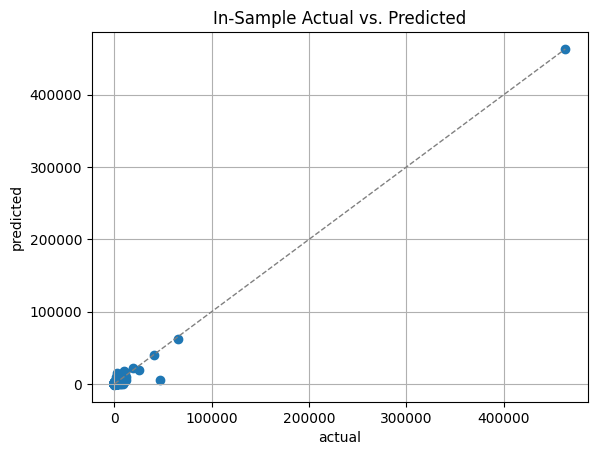

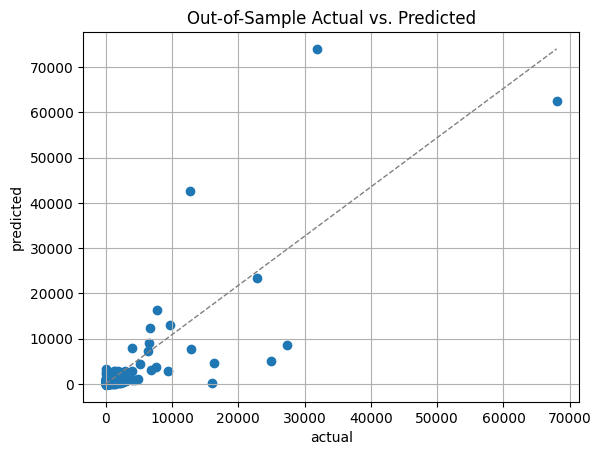

In [35]:
#Scatter Plot
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()

plt.show()
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

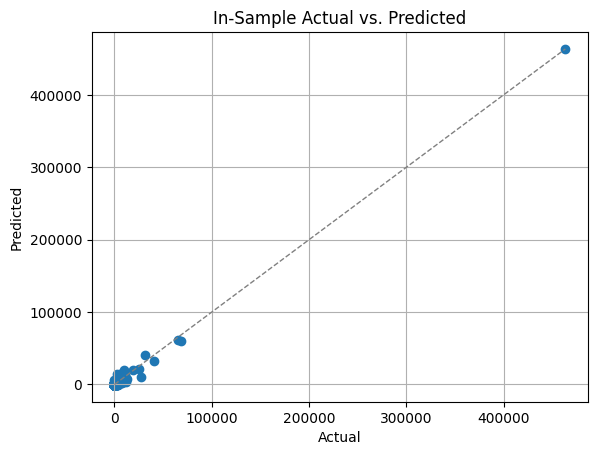

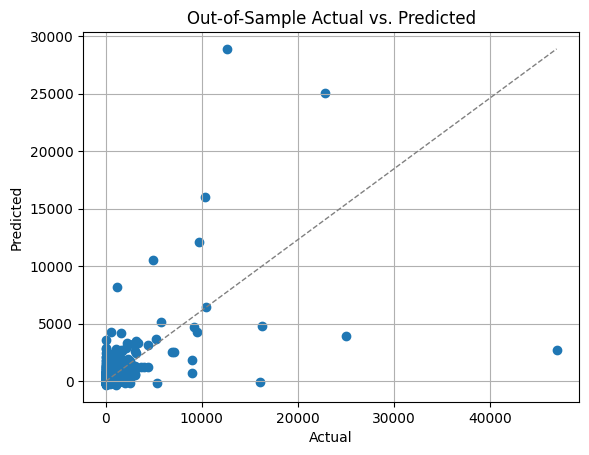

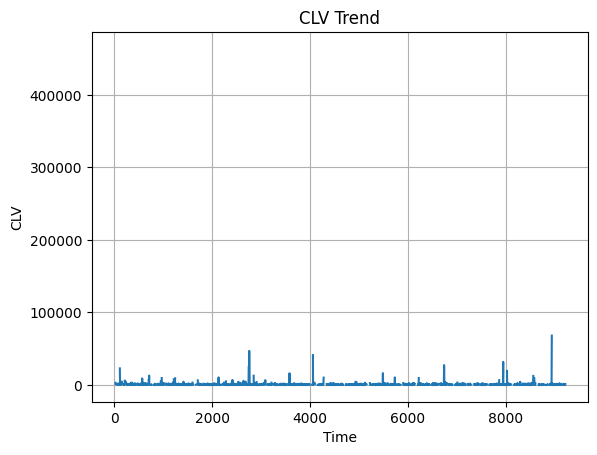

In [37]:
# Scatter Plot
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()
plt.show()

plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()
plt.show()

# Trend Line Plot
plt.plot(sample_set_df.index, sample_set_df[target_var])
plt.xlabel('Time')
plt.ylabel('CLV')
plt.title('CLV Trend')
plt.grid()
plt.show()


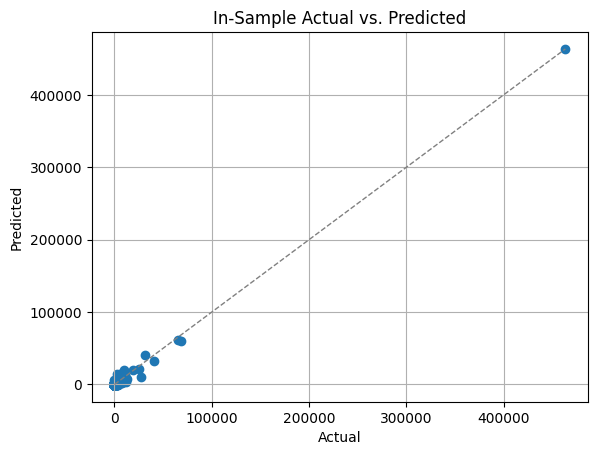

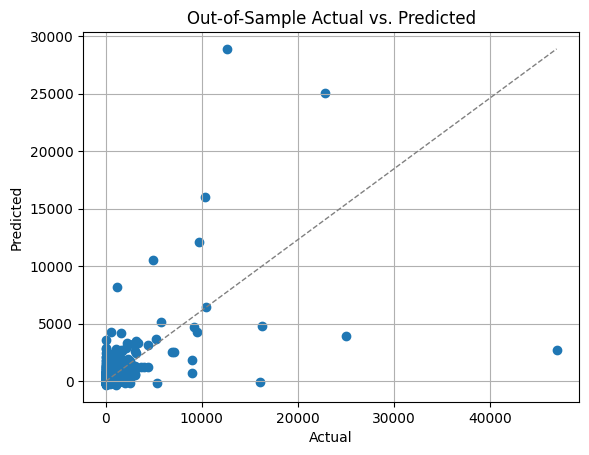

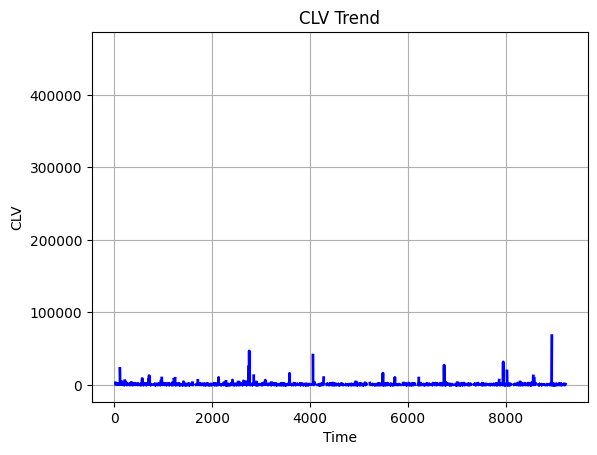

In [38]:
# Scatter Plot
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()
plt.show()

plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()
plt.show()

# Line Plot for CLV Trend
plt.plot(sample_set_df.index, sample_set_df[target_var], color='blue', lw=2)

plt.xlabel('Time')
plt.ylabel('CLV')
plt.title('CLV Trend')
plt.grid()
plt.show()
